<a href="https://colab.research.google.com/github/YogitaIngale/YogitaIngale/blob/main/CItyChatbotPopulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!pip install flask-ngrok
from flask_ngrok import run_with_ngrok


In [11]:
import threading
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from flask import Flask, request, jsonify
from IPython.display import display, Image


In [12]:
app = Flask(__name__)

# Sample city data
data = {
    "population": [
        {"year": 2000, "population": 500000},
        {"year": 2005, "population": 600000},
        {"year": 2010, "population": 750000},
        {"year": 2015, "population": 900000},
        {"year": 2020, "population": 1100000}
    ]
}

def generate_population_plot():
    df = pd.DataFrame(data['population'])
    sns.lineplot(x='year', y='population', data=df, marker='o')
    plt.title("City Population Growth")
    plt.xlabel("Year")
    plt.ylabel("Population")
    plt.grid()
    plt.savefig("population.png")
    plt.close()

@app.route('/chat', methods=['POST'])
def chat():
    user_input = request.json.get("message", "").lower()

    if "population" in user_input:
        generate_population_plot()
        return jsonify({"response": "Here is the city population growth graph.", "image": "population.png"})
    else:
        return jsonify({"response": "Ask about population to see a visualization!"})


In [13]:
def run_app():
    app.run(port=5000, debug=False, use_reloader=False)

flask_thread = threading.Thread(target=run_app)
flask_thread.start()


 * Serving Flask app '__main__'
 * Debug mode: off


Address already in use
Port 5000 is in use by another program. Either identify and stop that program, or start the server with a different port.


INFO:werkzeug:127.0.0.1 - - [03/Mar/2025 06:51:09] "POST /chat HTTP/1.1" 200 -


Here is the city population growth graph.


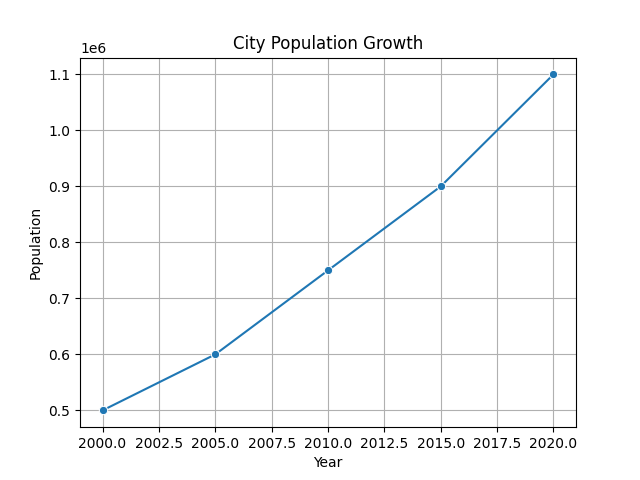

In [14]:
import requests

response = requests.post("http://127.0.0.1:5000/chat", json={"message": "Show me the population trend"})
data = response.json()
print(data["response"])

# Display the generated image
if "image" in data:
    display(Image("population.png"))
